In [1]:
# imports
import pandas as pd
import numpy as np
import mnist_reader
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from time import time

In [2]:
# Read data 
x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
# check shape, it is OK; BxN
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
# scale train data
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)

In [5]:
# scale test data
x_test_s=scaler.transform(x_test)

In [6]:
# train with SVC
# c is set 1 because of long training time
svc = SVC(kernel='linear', C=1, random_state=0)

In [7]:
# train with SVC, 30 minutes duration
t0=time()
svc.fit(x_train_s, y_train)
print(time()-t0)

1981.0390448570251


In [8]:
# prediction
y_predict = svc.predict(x_test_s)

Accuracy: 0.837 



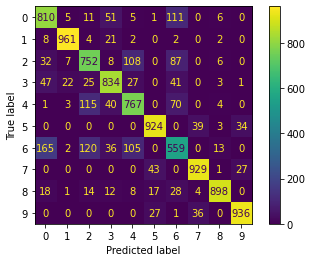

In [9]:
# accuracy
print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_predict), "\n")

# plot confusion matrix
plot_confusion_matrix(svc, x_test_s, y_test)

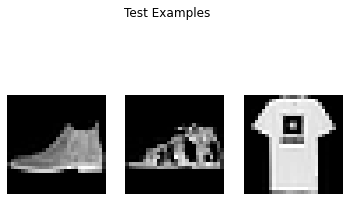

Predictions; True True True


In [11]:
# Visualize tree predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(x_test[0].reshape(28,28), cmap='gray')
ax2.matshow(x_test[11].reshape(28,28), cmap='gray')
ax3.matshow(x_test[121].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
fig.suptitle("Test Examples ")
plt.show()
print("Predictions;" ,y_predict[0]==y_test[0], y_predict[11]==y_test[11], y_predict[121]==y_test[121])

In [12]:
# train with RFC
rfc = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)

In [13]:
# train with RFC
rfc.fit(x_train_s, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [14]:
# prediction
y_predict = rfc.predict(x_test_s)

Accuracy: 0.8764 



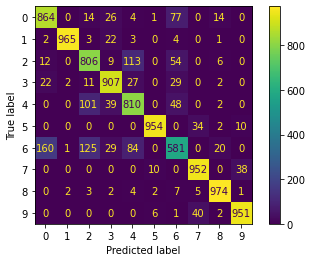

In [15]:
# accuracy
print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_predict), "\n")

# plot confusion matrix
plot_confusion_matrix(rfc, x_test_s, y_test)

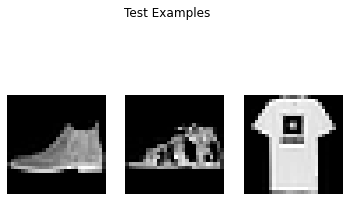

Predictions; True True True


In [16]:
# Visualize tree predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(x_test[0].reshape(28,28), cmap='gray')
ax2.matshow(x_test[11].reshape(28,28), cmap='gray')
ax3.matshow(x_test[121].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
fig.suptitle("Test Examples ")
plt.show()
print("Predictions;" ,y_predict[0]==y_test[0], y_predict[11]==y_test[11], y_predict[121]==y_test[121])

In [6]:
# use kNN
kNN=KNeighborsClassifier(n_neighbors=9)

In [7]:
#train kNN
kNN.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=9)

In [8]:
# prediction
y_predict = kNN.predict(x_test_s)

Accuracy: 0.8494 



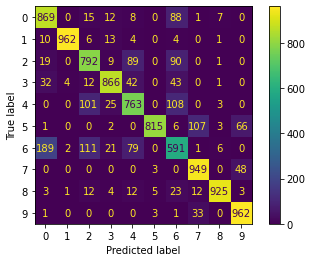

In [9]:
# accuracy
print("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_predict), "\n")

# plot confusion matrix
plot_confusion_matrix(kNN, x_test_s, y_test)

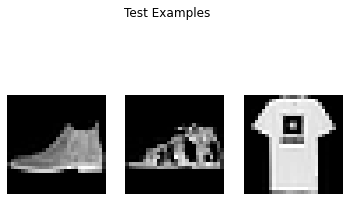

Predictions; True False True


In [19]:
# Visualize tree predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(x_test[0].reshape(28,28), cmap='gray')
ax2.matshow(x_test[11].reshape(28,28), cmap='gray')
ax3.matshow(x_test[121].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
fig.suptitle("Test Examples ")
plt.show()
print("Predictions;" ,y_predict[0]==y_test[0], y_predict[11]==y_test[11], y_predict[121]==y_test[121])

In [11]:
# DIMENSIONALITY REDUCTION
# apply PCAs
myPCA95=PCA(n_components=0.95)
myPCA75=PCA(n_components=0.75)
myPCA50=PCA(n_components=0.50)
myPCA25=PCA(n_components=0.25)
x_train_pca95 = myPCA95.fit_transform(x_train_s)
x_train_pca75 = myPCA75.fit_transform(x_train_s)
x_train_pca50 = myPCA50.fit_transform(x_train_s)
x_train_pca25 = myPCA25.fit_transform(x_train_s)

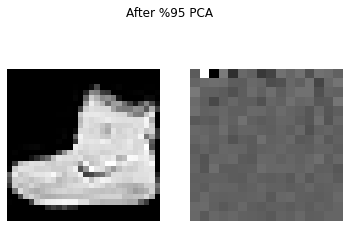

In [24]:
# Visualize after %95 PCA
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x_train[0].reshape(28,28), cmap='gray')
ax2.matshow(x_train_pca95[0].reshape(16,16), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("After %95 PCA")
plt.show()

In [25]:
print('Dimensions after %95 PCA: ', myPCA95.n_components_)
print('Dimensions after %75 PCA: ', myPCA75.n_components_)
print('Dimensions after %50 PCA: ', myPCA50.n_components_)
print('Dimensions after %25 PCA: ', myPCA25.n_components_)

Dimensions after %95 PCA:  256
Dimensions after %75 PCA:  32
Dimensions after %50 PCA:  5
Dimensions after %25 PCA:  2


In [12]:
# PCA test data
x_test_pca95=myPCA95.transform(x_test_s)
x_test_pca75=myPCA75.transform(x_test_s)
x_test_pca50=myPCA50.transform(x_test_s)
x_test_pca25=myPCA25.transform(x_test_s)

In [27]:
# train with SVC
# c is set 1 because of long training time
svc95 = SVC(kernel='linear', C=1, random_state=0)
svc75 = SVC(kernel='linear', C=1, random_state=0)
svc50 = SVC(kernel='linear', C=1, random_state=0)
svc25 = SVC(kernel='linear', C=1, random_state=0)

In [28]:
# train with SVC
t0=time()
svc95.fit(x_train_pca95, y_train)
svc75.fit(x_train_pca75, y_train)
svc50.fit(x_train_pca50, y_train)
svc25.fit(x_train_pca25, y_train)
print(time()-t0)
# 824.6650595664978 for 0.95 PCA

1396.3676526546478


In [29]:
# prediction
y_predict95 = svc95.predict(x_test_pca95)
y_predict75 = svc75.predict(x_test_pca75)
y_predict50 = svc50.predict(x_test_pca50)
y_predict25 = svc25.predict(x_test_pca25)

In [33]:
# accuracy
print("Accuracy after %95 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict95), "\n")
print("Accuracy after %75 PCA: ", accuracy_score(y_true=y_test, y_pred=y_predict75), "\n")
print("Accuracy after %50 PCA: ", accuracy_score(y_true=y_test, y_pred=y_predict50), "\n")
print("Accuracy after %25 PCA: ", accuracy_score(y_true=y_test, y_pred=y_predict25), "\n")

Accuracy after %95 PCA: 0.8502 

Accuracy after %75 PCA:  0.8246 

Accuracy after %50 PCA:  0.7156 

Accuracy after %25 PCA:  0.5146 



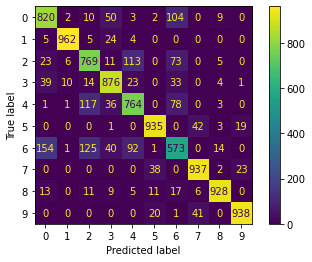

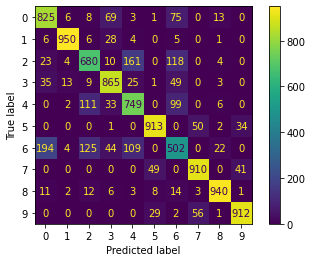

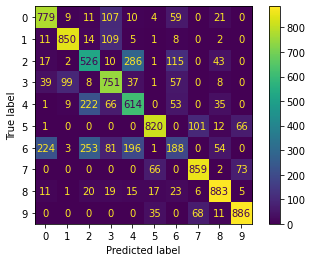

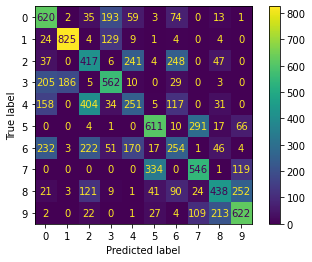

In [31]:
# plot confusion matrix
plot_confusion_matrix(svc95, x_test_pca95, y_test)
plot_confusion_matrix(svc75, x_test_pca75, y_test)
plot_confusion_matrix(svc50, x_test_pca50, y_test)
plot_confusion_matrix(svc25, x_test_pca25, y_test)

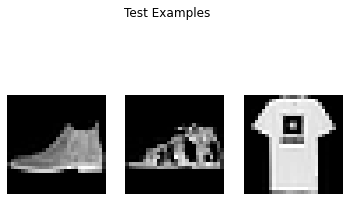

Predictions %95 PCA; True True True
Predictions %75 PCA; True True True
Predictions %50 PCA; False True True
Predictions %25 PCA; False False True


In [34]:
# Visualize tree predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(x_test[0].reshape(28,28), cmap='gray')
ax2.matshow(x_test[11].reshape(28,28), cmap='gray')
ax3.matshow(x_test[121].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
fig.suptitle("Test Examples ")
plt.show()
print("Predictions %95 PCA;" ,y_predict95[0]==y_test[0], y_predict95[11]==y_test[11], y_predict95[121]==y_test[121])
print("Predictions %75 PCA;" ,y_predict75[0]==y_test[0], y_predict75[11]==y_test[11], y_predict75[121]==y_test[121])
print("Predictions %50 PCA;" ,y_predict50[0]==y_test[0], y_predict50[11]==y_test[11], y_predict50[121]==y_test[121])
print("Predictions %25 PCA;" ,y_predict25[0]==y_test[0], y_predict25[11]==y_test[11], y_predict25[121]==y_test[121])

In [35]:
# train with RFC
rfc95 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
rfc75 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
rfc50 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)
rfc25 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)

In [36]:
# train with RFC
rfc95.fit(x_train_pca95, y_train)
rfc75.fit(x_train_pca75, y_train)
rfc50.fit(x_train_pca50, y_train)
rfc25.fit(x_train_pca25, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [37]:
# prediction
y_predict95 = rfc95.predict(x_test_pca95)
y_predict75 = rfc75.predict(x_test_pca75)
y_predict50 = rfc50.predict(x_test_pca50)
y_predict25 = rfc25.predict(x_test_pca25)

In [38]:
# accuracy
print("Accuracy %95 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict95), "\n")
print("Accuracy %75 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict75), "\n")
print("Accuracy %50 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict50), "\n")
print("Accuracy %25 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict25), "\n")

Accuracy %95 PCA: 0.8584 

Accuracy %75 PCA: 0.8552 

Accuracy %50 PCA: 0.7564 

Accuracy %25 PCA: 0.5035 



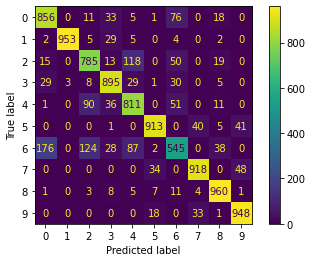

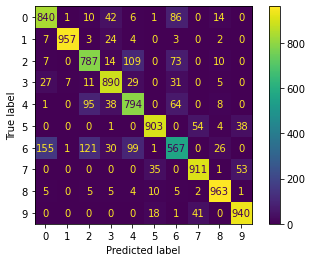

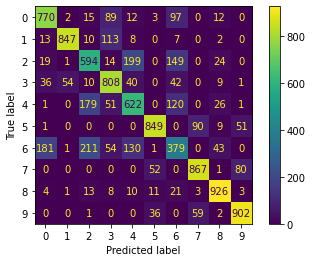

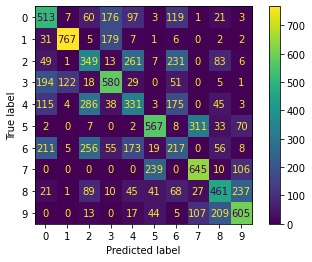

In [39]:
# plot confusion matrix
plot_confusion_matrix(rfc95, x_test_pca95, y_test)
plot_confusion_matrix(rfc75, x_test_pca75, y_test)
plot_confusion_matrix(rfc50, x_test_pca50, y_test)
plot_confusion_matrix(rfc25, x_test_pca25, y_test)

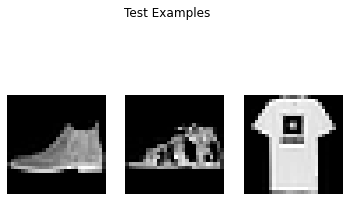

Predictions %95 PCA; True True True
Predictions %75 PCA; True True True
Predictions %50 PCA; True True True
Predictions %25 PCA; False False True


In [40]:
# Visualize tree predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(x_test[0].reshape(28,28), cmap='gray')
ax2.matshow(x_test[11].reshape(28,28), cmap='gray')
ax3.matshow(x_test[121].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
fig.suptitle("Test Examples ")
plt.show()
print("Predictions %95 PCA;" ,y_predict95[0]==y_test[0], y_predict95[11]==y_test[11], y_predict95[121]==y_test[121])
print("Predictions %75 PCA;" ,y_predict75[0]==y_test[0], y_predict75[11]==y_test[11], y_predict75[121]==y_test[121])
print("Predictions %50 PCA;" ,y_predict50[0]==y_test[0], y_predict50[11]==y_test[11], y_predict50[121]==y_test[121])
print("Predictions %25 PCA;" ,y_predict25[0]==y_test[0], y_predict25[11]==y_test[11], y_predict25[121]==y_test[121])

In [13]:
# use kNN
kNN95=KNeighborsClassifier(n_neighbors=9)
kNN75=KNeighborsClassifier(n_neighbors=9)
kNN50=KNeighborsClassifier(n_neighbors=9)
kNN25=KNeighborsClassifier(n_neighbors=9)

In [14]:
# train with kNN
kNN95.fit(x_train_pca95, y_train)
kNN75.fit(x_train_pca75, y_train)
kNN50.fit(x_train_pca50, y_train)
kNN25.fit(x_train_pca25, y_train)

KNeighborsClassifier(n_neighbors=9)

In [15]:
# prediction
y_predict95 = kNN95.predict(x_test_pca95)
y_predict75 = kNN75.predict(x_test_pca75)
y_predict50 = kNN50.predict(x_test_pca50)
y_predict25 = kNN25.predict(x_test_pca25)

In [16]:
# accuracy
print("Accuracy %95 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict95), "\n")
print("Accuracy %75 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict75), "\n")
print("Accuracy %50 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict50), "\n")
print("Accuracy %25 PCA:", accuracy_score(y_true=y_test, y_pred=y_predict25), "\n")

Accuracy %95 PCA: 0.8597 

Accuracy %75 PCA: 0.8433 

Accuracy %50 PCA: 0.7454 

Accuracy %25 PCA: 0.5255 



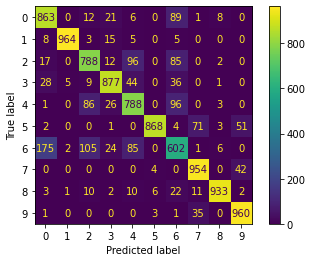

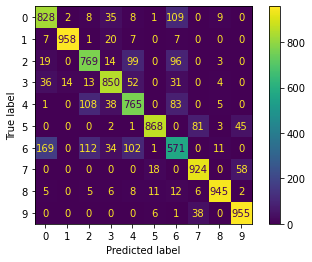

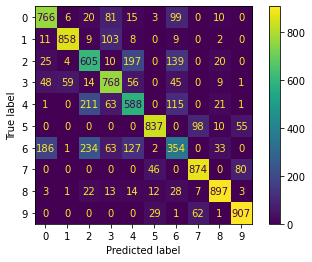

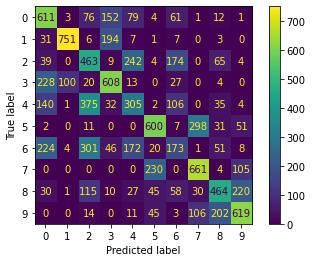

In [17]:
# plot confusion matrix
plot_confusion_matrix(kNN95, x_test_pca95, y_test)
plot_confusion_matrix(kNN75, x_test_pca75, y_test)
plot_confusion_matrix(kNN50, x_test_pca50, y_test)
plot_confusion_matrix(kNN25, x_test_pca25, y_test)

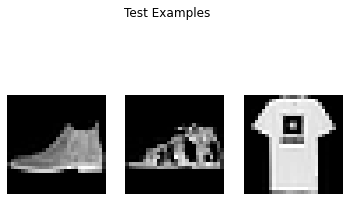

Predictions %95 PCA; True True True
Predictions %75 PCA; True True True
Predictions %50 PCA; True True True
Predictions %25 PCA; False False True


In [18]:
# Visualize tree predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.matshow(x_test[0].reshape(28,28), cmap='gray')
ax2.matshow(x_test[11].reshape(28,28), cmap='gray')
ax3.matshow(x_test[121].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
fig.suptitle("Test Examples ")
plt.show()
print("Predictions %95 PCA;" ,y_predict95[0]==y_test[0], y_predict95[11]==y_test[11], y_predict95[121]==y_test[121])
print("Predictions %75 PCA;" ,y_predict75[0]==y_test[0], y_predict75[11]==y_test[11], y_predict75[121]==y_test[121])
print("Predictions %50 PCA;" ,y_predict50[0]==y_test[0], y_predict50[11]==y_test[11], y_predict50[121]==y_test[121])
print("Predictions %25 PCA;" ,y_predict25[0]==y_test[0], y_predict25[11]==y_test[11], y_predict25[121]==y_test[121])